#**Maestría en Inteligencia Artificial Aplicada**
##**Análisis de grandes volúmenes de datos**
###Tecnológico de Monterrey
###Prof Dr. Nestor Velasco Bermeo

## Avance de proyecto 1: Sistema de Recomendación

Alumnos:


*   A01794456 - Hugo Enrique Solano Ortega
*   A01111178 - Alan García Bernal
*   A01794906 - José Luis Artigas Arroyo




## El objetivo de este ejercicio consiste en poder dar una recomendación de 10 películas basados en el nombre de una pelícla del gusto del usuario

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from wordcloud import WordCloud
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

from google.colab import drive
from sklearn.decomposition import TruncatedSVD


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carga Alán
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/Big Data/ml-latest-small"
os.chdir(DIR)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/MNA/Big Data/ml-latest-small'

In [ ]:
# Cargamos los datos:
DIR = "/content/drive/MyDrive/Colab Notebooks/BigData/Wk05"
os.chdir(DIR)

In [ ]:
# Carga José L.
DIR = "/content/drive/MyDrive/Big Data/Compartido/ml-latest-small/ml-latest-small"
os.chdir(DIR)

In [ ]:
ratings = pd.read_csv('ratings.csv', header='infer', sep=",")
movies = pd.read_csv('movies.csv', header='infer', sep=",")
tags = pd.read_csv('tags.csv', header='infer', sep=",")

In [ ]:
print(ratings.shape, movies.shape, tags.shape)

(100836, 4) (9742, 3) (3683, 4)


# **Descripción del conjunto de datos**
## *En este apartado se hace un análisis de la estructura y los datos contenidos en los data sets Ratings y Movies

### **Ratings**


El datasets de Ratings cuenta con 4 variables distintas, todas numéricas. sin embargo, la mayoría de las variables son categóricas. Las podemos describir de la siguiente manera:

  1. **userId**: número entero para distinguir a cada usuarios. El dataset completo no cuenta con información de los usuarios.
  2. **moviesId**: número entero para etiquetar a cada película, se usa para unir la tabla ratings a la tabla movies.
  3. **rating**: número decimal, variable categórica ordinal con la calificación que dió el cliente a cada película. Los valores van del 0.5 al 5.0 en intervalos de 0.5.
  4. **timestamp**: timestamp de la fecha y hora en la que se realizó la evaluación.

  -Haciendo una validación, este data set no cuenta con valores faltantes.

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# Valores nulos
ratings.isna().sum()/len(ratings) * 100

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

In [ ]:
# Valores únicos
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

### **Movies**


Este dataset contiene la información de la película y se puede unir al dataset **ratings** a través de la columna **movieId**. Cuenta con 3 variables:

1. **movieId**: valor numérico, con el código de la película que se utiliza para unirlo a la tabla *ratings*.
2. **title**: columna de texto que contiene el título de la película además del año de publicación entre paréntesis.
3. **genres**: valor de texto que contiene los géneros de cine de cada película, cada uno está separado por el símbolo '|'.

el dataset cuenta con 9,742 registros y de nuevo vemos que no tiene datos faltantes.

In [ ]:
# Películas
print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Valores nulos
movies.isna().sum()/len(movies) * 100

movieId    0.0
title      0.0
genres     0.0
dtype: float64

In [ ]:
# Valores únicos
movies.nunique()

movieId    9742
title      9737
genres      951
dtype: int64

### **Tags**

El dataset de *tags* contiene 4 variables:

  1. **userId**: información con el identificador de cada usuario.
  2. **movieId**: información con el identificador de cada película, se utiliza para ligarlo a la tabla movieId y como llave foranea a la tabla de ratings.
  3. **tag**: variable de texto con la información de los tags de cada título.
  4. **timestamp**: información con la fecha y hora en que cada película fue taggeada por un usuario.


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
# Valores nulos
tags.isna().sum()/len(movies) * 100

userId       0.0
movieId      0.0
tag          0.0
timestamp    0.0
dtype: float64

In [ ]:
# Valores únicos
tags.nunique()

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


# **Exploaración del conjunto de datos**

**Observaciones:**


*   Todas las filas en las 3 tablas contienen datos
*   Las columnas "Timestamp" tienen una cantidad alta de valores únicos y no serán utilizadas
*   Se tiene un catálogo de 9,742 películas distribuídas entre 951 combinaciones de géneros
*   Han evaluado 610 usuarios a 9,724 películas en una escala de 0.5 a 5
*   58 usuarios realizaron en total 1,589 comentarios a 1,572 películas

### **Ratings**

Cuando analizamos la tabla de ratings tenemos una calificación promedio de 3.5 con moda de 4.0, además, por la naturaleza de esta variable será una de las principales variables que utilizaremos para el sistema de recomendaciones.

Además, podemos ver que tenemos 610 usuarios distintos evaluando las películas, con un promedio de 165 películas evaluadas por usuario, con un máximo de 2,698

In [ ]:
# Escala de valoración
ratings['rating'].value_counts().sort_index()

rating
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: count, dtype: int64

In [ ]:
# Estadísticos descriptivos del rating
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<Axes: xlabel='rating', ylabel='count'>

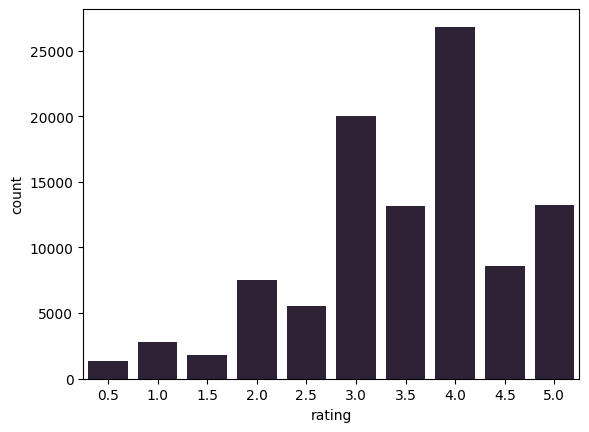

In [ ]:
#Gráficas de recuentos únicos
sns.set_palette("mako")
sns.countplot(x=ratings['rating'])

Como podemos observar, la escala va de un rango de 0.5 hasta 5, asumimos que 5 es la evaluación máxima.

No existe una evaluación que podamos descartar con el objetivo de reducir dimensionalidad

Resumen de películas evaluadas por usuarios.

### **Movies**

En cuanto a este data set de *movies* detalles importantes a solucionar:
 1. Primero es que la columna *title* contiene también la información del año de publicación, por lo que tendrá que ser separado en 2 columnas. Esto bajo la hipótesis de que el año de publicación tiene valor predictivo.
 2. Segundo, la columna de géneros incluye múltiples categorías, por lo que se necesitará planear una forma de procesar esta inforamció para usarlas como predictor (si se identifica que tienen valor predictivo). En este caso omitiremos esta columna y nos concentraremos en hacer predicciones basadas en los ratings de las películas. La columna de generos la descartaremos.
 3. La cantidad de IDs para movie es igual a 9,742 pero los títulos son 9,737, indicando que hay 5 películas con el mismo nombre pero con diferente ID; por lo que esto puede prestarse a confusión al considerar una película y no saber exactamente cuáles fueron sus evaluaciones

In [ ]:
#Descubrimos cuáles son las películas que estan repetidas
movies.title.value_counts().nlargest(10)

title
Emma (1996)                                                    2
War of the Worlds (2005)                                       2
Confessions of a Dangerous Mind (2002)                         2
Eros (2004)                                                    2
Saturn 3 (1980)                                                2
Paranoid Park (2007)                                           1
I'm a Cyborg, But That's OK (Saibogujiman kwenchana) (2006)    1
Bug (2007)                                                     1
Mr. Brooks (2007)                                              1
Librarian: Return to King Solomon's Mines, The (2006)          1
Name: count, dtype: int64

In [ ]:
movies.movieId.value_counts().nlargest(10)

movieId
1        1
53322    1
53129    1
53138    1
53140    1
53143    1
53161    1
53280    1
53318    1
53326    1
Name: count, dtype: int64

Respecto de la columna de 'genres' tenemos 951 valores distintos debido a la combinación de géneros, por lo que transformaremos esta columna para que sea más sencilla de utilizar por los modelos a probar.

In [ ]:
movies.genres.value_counts()

genres
Drama                                                  1053
Comedy                                                  946
Comedy|Drama                                            435
Comedy|Romance                                          363
Drama|Romance                                           349
                                                       ... 
Action|Crime|Horror|Mystery|Thriller                      1
Adventure|Animation|Children|Comedy|Musical|Romance       1
Action|Adventure|Animation|Comedy|Crime|Mystery           1
Children|Comedy|Fantasy|Sci-Fi                            1
Action|Animation|Comedy|Fantasy                           1
Name: count, Length: 951, dtype: int64

Aquí podemos ver que, incluyendo 'no genres listed' la base de datos incluye un total de 20 valores, que fuero condificados como 1 y 0 para su posterior análisis.

### **Tags**

  Después de una inspección rápida de los tags, vemos que a esta tabla le falta mucha estanadrización, ya que contiene tanto como géneros de películas, opiniones personales, nombres de actores, entre otros tipos de datos, por lo que consideramos poco conveniente usar para realizar recomendaciones en este punto del proyecto.

In [ ]:
tags.tag.nunique()

1589

In [ ]:
tags_proc = tags.tag.str.lower()

In [ ]:
tokenizer = nltk.tokenize.ToktokTokenizer()
string = tokenizer.tokenize(tags_proc, return_str = True)

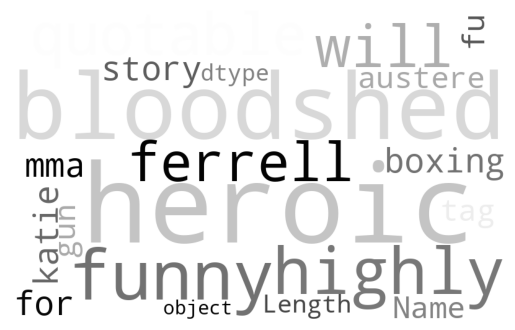

In [ ]:
wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(string)
plt.axis("off")
plt.imshow(wc)

# **Preprocesamiento**


En la exploración de datos anterior encontramos que hay 5 películas que se repiten.

Lo primero que haremos es verificar si eliminando el año en el título obtendremos más casos donde el título se repita, si es así no nos convendrá eliminar el año del título porque puede existir el caso que una película se haya re-editado y la evaluación sea distinta.

In [ ]:
#Separando el año del título de la película
movies.title.str.split('\(|\)', expand=True).iloc[:,[0,1]].rename(columns={0: 'title', 1: 'year'}).title.value_counts().nlargest(10)
#movies_aux.head()

title
Christmas Carol, A        5
Hamlet                    5
Three Musketeers, The     4
Jane Eyre                 4
Misérables, Les           4
Alice in Wonderland       3
Running Scared            3
Gulliver's Travels        3
King Solomon's Mines      3
Emma                      3
Name: count, dtype: int64

Como podemos ver, lo mejor es no separar los años de la publicación de la película del título.

Eliminamos la columna de generos para no acarrear información que no será útil en la predicción.

In [ ]:
#Descartando la columna de generos
movies.drop(columns=['genres'], inplace=True)
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


Eliminamos las peliculas repetidas

In [ ]:
movies = movies.drop_duplicates(subset=['title'], keep='first')
movies.nunique()

movieId    9737
title      9737
dtype: int64

In [ ]:
df = pd.merge(ratings, movies, how='left', on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,1,3,4.0,964981247,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Heat (1995)
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)"


In [ ]:
#Comprobando que tengamos la cantidad de filas adecuadas
print(df.shape[0])
print(ratings.shape[0])

100836
100836


In [ ]:
#Eliminamos la columna timestamp ya que no provee información de nuestro interés
df.drop(columns=['timestamp'], inplace=True)
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [ ]:
# Películas más valoradas
mas_val = pd.DataFrame(df.groupby("title")['userId'].count())
mas_val.sort_values(by = 'userId',ascending=False).head(10)

,userId
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


# **Modelo**

Reducción de Dimensionalidad mediante la factorización de la Descomposición en Valores Singulares SVD (Singular Value Descomposition).

Este tipo de solución suele aplicarse como un sistema de recomendación de productos a usuarios, de acuerdo al historial de evaluaciones que han realizado en el pasado a ciertos productos.

In [ ]:
#Generamos nuestra matriz de utilidad, la cuál nos proporciona la evaluación que cada usuario le ha dado a cada película
#Rellenamos en caso de que haya algún valor faltante
UtMx = df.pivot_table(values='rating', index='userId', columns='title', fill_value=0)
UtMx.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.0,0
2,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
6,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
7,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
8,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
9,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,1.0,0.0,0.0,0


In [ ]:
print('Total de elementos de la matriz de utilidad: %d' % (UtMx.size))
print('Total de elementos diferentes de cero: %d' % (np.count_nonzero(UtMx)))
print('Porcentaje de elementos diferentes de cero: %.1f%%' % (100 * np.count_nonzero(UtMx) / UtMx.size))

Total de elementos de la matriz de utilidad: 5928590
Total de elementos diferentes de cero: 100830
Porcentaje de elementos diferentes de cero: 1.7%


In [ ]:
X = UtMx.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X.shape

(9719, 610)

In [ ]:
# Obtengamos la cantidad de información contenida en la factorización SVD, considerando
# los valores singulares más representativos de dicha factorización.
# Para este caso inicial usaremos todos los vectores singulares, para luego
# compararlo con el caso al reducir su dimensión.

 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 943:
SVD = TruncatedSVD(n_components=609, random_state=1)
SVD.fit(X)

num_sv = 10   # En particular los 10 primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.

print('Cantidad de información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))

Cantidad de información simplificada con los primeros 10 vectores singulares:
90.6%


Consideramos que mas del 90% de información es útil para nuestro ejercicio

In [ ]:
# Usemos las primeras 10 componentes de dicha factorización.
# Es decir reducimos la dimensión de la matriz X con solamente sus primeras componentes:

num_sv = 10

SVD = TruncatedSVD(n_components=num_sv, random_state=1)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(9719, 10)

In [ ]:
# Obtengamos la matriz de correlación de Pearson entre todas las
# variables latentes de las películas:

corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(9719, 9719)

In [ ]:
#Generamos una lista de nombres de las peliculas
names = UtMx.columns
names_list = list(names)
print(names_list[0:30])

["'71 (2014)", "'Hellboy': The Seeds of Creation (2004)", "'Round Midnight (1986)", "'Salem's Lot (2004)", "'Til There Was You (1997)", "'Tis the Season for Love (2015)", "'burbs, The (1989)", "'night Mother (1986)", '(500) Days of Summer (2009)', '*batteries not included (1987)', '...All the Marbles (1981)', '...And Justice for All (1979)', '00 Schneider - Jagd auf Nihil Baxter (1994)', '1-900 (06) (1994)', '10 (1979)', '10 Cent Pistol (2015)', '10 Cloverfield Lane (2016)', '10 Items or Less (2006)', '10 Things I Hate About You (1999)', '10 Years (2011)', '10,000 BC (2008)', '100 Girls (2000)', '100 Streets (2016)', '101 Dalmatians (1996)', '101 Dalmatians (One Hundred and One Dalmatians) (1961)', "101 Dalmatians II: Patch's London Adventure (2003)", '101 Reykjavik (101 Reykjavík) (2000)', '102 Dalmatians (2000)', '10th & Wolf (2006)', '10th Kingdom, The (2000)']


In [ ]:
#Escogemos esta película para hacer unas pruebas

me_gusta = "101 Dalmatians II: Patch's London Adventure (2003)"
id_megusta = names_list.index(me_gusta)
print(id_megusta)
corr_recomienda = corrMx[id_megusta]

#La correlacion de esta película consigmo misma debe de ser lo mas cercano a 1
print(corr_recomienda[id_megusta])

25
1.0


In [ ]:
#Explorando las correlaciones de "me_gusta", para saber en qué rango quisieramos escoger:
print("Maximo: ", np.max(corr_recomienda))
print("Minimo: ", np.min(corr_recomienda))
print("Promedio: ", np.mean(corr_recomienda))
print("Mediana: ", np.median(corr_recomienda))

Maximo:  1.0
Minimo:  -0.6748495990098202
Promedio:  0.12909917036986268
Mediana:  0.11418116184983762


Ahora seleccionaremos algunas de las películas que tienen una alta correlacion con la película que escogimos

In [ ]:
list(names[(corr_recomienda > .9) & (corr_recomienda < 0.99)])[0:10]

['Alvin and the Chipmunks (2007)',
 'Australia (2008)',
 'Bedrooms & Hallways (1998)',
 'Gigi (1949)',
 'Girls! Girls! Girls! (1962)',
 'Humpday (2009)',
 "Love's Labour's Lost (2000)",
 'Maybe Baby (2000)',
 'Nancy Drew (2007)',
 'Patrik Age 1.5 (Patrik 1,5) (2008)']